### Polynomial Regression 을 이용한 Underfitting, Overfitting 이해
**cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬**

** 사이킷런의 예제 코드 임 **

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

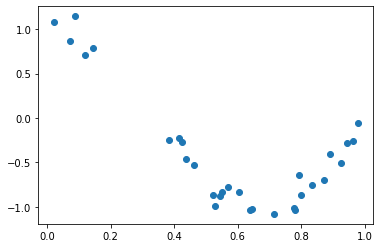

In [3]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87416400e+06  2.03716560e+07
 -1.44873571e+08  7.09316967e+08 -2.47066414e+09  6.24562770e+09
 -1.15676855e+10  1.56895436e+10 -1.54006546e+10  1.06457645e+10
 -4.91379382e+09  1.35920182e+09 -1.70381489e+08] 입니다.
Degree 15 MSE 는 182663732.56 입니다.


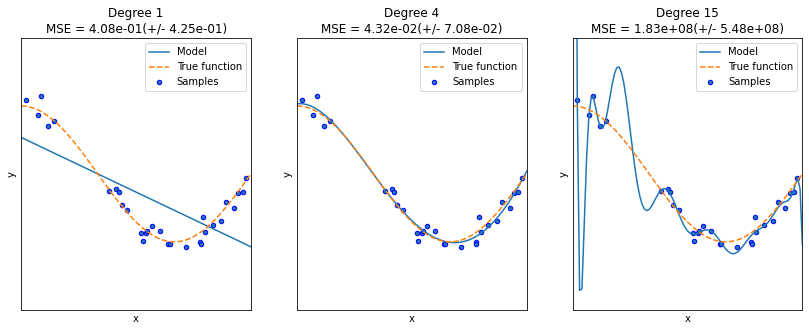

In [4]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

# degree 1은 심플한 직선을 예측. MSE 지수는 0.4정도
# degree 4는 consine 곡선에 적합하게 예측을 함. MSE 지수도 굉장히 낮아짐

# degree 15는 거의 예측을 했음. 그러나 
# 실제 선은 cosine 곡선을 시뮬레이션 했지만 학습데이터를 정확하게 가져가다 보니까
# 곡선이 이상한 모양으로만들어짐 - MSE의 수치가 엄청나졌음
# 모든 곡선을 예측하기 위해서 학습 데이터에 충실하다 보니 어떤 테스트형 데이터여도 오류가 나올 수 밖에 없음
# 회귀계수를 보면 10승인 경우도 있음. 그러므로 조금만 오차를 내면 엄청난 오류가 될 수 있음

### 학습 오류, 일반화 오류, 예측 오류
- 학습 오류 : 학습 데이터를 사용하여 모델을 생성하고 측정한 오류
- 일반화 오류 : 기본 데이터 분포에서 새로운 데이터를 추출, 모델에 적용할 때 예상되는 오류
- 예측 오류 : 테스트 데이터를 모델에 적용하여 측정한 오류로, 일반화 오류의 추정에 사용


★ Machine Learning은 학습 오류와 일반화 오류 사이의 격차를 최소화 하는 것을 목표
- 일반화 오류는 예측 오류로 추정함

### 편향-분산 트레이드오프(Biase-Variance Tradeoff)

**편향(bais)**
- 예측값이 정답과 얼마나 다른가 

**분산(variance)**
- 예측값들이 서로 얼마나 흩어져 있는가

### 일반화 오차 = $bais^2 + variance$

출처 : https://scott.fortmann-roe.com/docs/BiasVariance.html

### 과소적합(Underfitting) / 과대적합(Overfitting)

**과소적합(Underfitting)**
- 주어진 입력 데이터에 비하여 모델의 복잡도가 너무 낮아 입력 데이터로부터 충분히 학습하지 못하는 상황

**과대적합(overfitting)**
- 주어진 입력 데이터에 비하여 모델의 복잡도가 너무 높아 입력 데이터의 잡음까지 fitting하는 경향을 보이고 일반화에 실패하는 상황

출처 : https://www.knowledgehut.com/blog/data-science/overfitting-and-underfitting-in-machine-learning

**Underfitting에 대한 대응**
- 학습 시간을 늘린다 (Deep Learning이나 Auto-parameter Tuning 경우)
- 더 복잡한 모델을 구성한다
- 모델에 추가 Feature를 도입한다
- Regularization을 사용하지 않거나 영향을 줄인다
- 모델을 다시 구축한다

**Overfitting에 대한 대응**
- 학습을 더 일찍 멈추게 한다
- 데이터를 추가한다
- 모델의 복잡도를 낮춘다
- 일부 Feature를 제거한다
- Regularization을 활용한다
- 앙상블 모델을 적용한다